# Lab 2 Inteligencia Artificial 
### Alejandro Tejada
### Carné: 17584
### Curso: Inteligencia Artificial
### Fecha: 8/04/2020

# Redes Neuronales

En el presente laboratorio, el motivo era usar un algoritmo de AI capaz de predecir el tipo de ropa al cual pertenecía una imagen de 28x28 pixeles. Esto se lograría mediante una red neuronal y tratando como valores binarios los pixeles y su dimensionalidad. 


## Estructura del Repositorio

* NeuralNetwork.py
    * Contiene los algoritmos para poder entrenar al modelo, back propagation, feed forward, etc.
    
* mnis_reader.py
    * Extraido del repositorio de prueba, es para poder leer los archivos

* trainerMnist.py:
    * Es el que contiene el método de entrenamiento **NO PONER A CORRER** porque tarda unas 5 horas.

* testMnist.py:
    * Hace los test para ver como queda y la eficiencia. Pondré el codigo acá para ver esa parte.

## Código de testMnist.py para poder ver la eficiencia y la gráfica

Lectura de los datos de la ropa
Valores Correctos:.... 8850
Prediccions incorrectas: ......1150
Exactitud para este modelo: ..........88.5


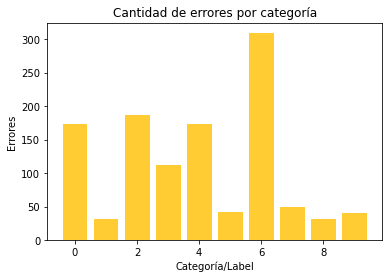

In [2]:
""" 
Nombre: Alejandro Tejada
Curso: ingeligencia artificial
Maestro: Samuel Chavez
Laboratorio #2
testMnis.py es el programa que hace el test
"""


# --------------ZONA DE  IMPORTS
import mnist_reader  # ESTE mnist_reader lo que hace es que lee la data
from scipy.optimize import minimize
import numpy as np
from NeuralNetwork import *
import pickle
import matplotlib.pyplot as pd
import mnist_reader
import pandas as plt
# ------------FIN ZONA LIBRERÍAS E IMPORTS

# ----------------------------------ZONA CONSTANTES*--------------
'''
Factor para que la sigmoide no baje
'''
FactorNormal = 1000.0  # normalizacion
CNeuronas = 136  # neuronas ocultas
CNeuronasSalida = 10  # salida
# ----------------------FIN ZONA CONSTANTES
# Lectura de datos
print("Lectura de los datos de la ropa")
X_test, y_test = mnist_reader.load_mnist('DatosTrainingYTest', kind='t10k')

#! Cargamos el modelo
modeloCarga = open('modeloThetas', 'rb')
flat_thetas = pickle.load(modeloCarga)
modeloCarga.close()
X = X_test/FactorNormal
m, n = X.shape

# Labels d elas imagnes
y = y_test.reshape(m, 1)
Y = (y == np.array(range(10))).astype(int)
# construccion del modelo
theta_shapes = np.array([
    [CNeuronas, n+1],
    [CNeuronasSalida, CNeuronas+1]
])
# resultado
resultado = feed_forward(
    inflate_matrixes(flat_thetas, theta_shapes),
    X
)
# Prediccion de valores
#! esta prediccion se toma la ultiam
prediccion = np.argmax(resultado[-1], axis=1).reshape(m, 1)

correctos = ((prediccion == y)*1).sum()
incorrectos = len(y)-correctos

print("Valores Correctos:.... "+str(correctos))
print("Prediccions incorrectas: ......"+str(incorrectos))
print("Exactitud para este modelo: .........." +
      str(correctos*100/float(len(y))))

prediccionMal = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(y)):
    if(not(y[i] == prediccion[i])):
        prediccionMal[int(y[i])] += 1
# ploteamos los malos
pd.title('Cantidad de errores por categoría')
pd.xlabel('Categoría/Label')
pd.ylabel('Errores')
pd.bar(range(len(prediccionMal)), prediccionMal, color=(1, 0.8, 0.2, 1))
pd.show()


## Analizando los resultados

Notamos que al momento de hacer la lectura de los datos sucede algo.
El modelo de thetas ya está guardado en un archivo binario que abrimos con pickle. Es decir, ya son los adecuados. 
Principales hallazgos:
* El modelo tiene un 88.5 por ciento de eficiencia (osea 89% lol). Lo cual convierte la cantidad de accuracy una aceptable para un modelo así.
* Las categorías que mas fallaron fue la categoría No.6. Abajo podemos ver la tabla, y vemos que la 6 son **las camisas**. Ahora bien, si notamos la cantida de camisas que hay y las vemos por encima, notamos que son similares **incluso para nosotros los humanos**. Entonces, es de esperarse que fallen ya que no comparten tantas diferencias como un zapato vs camisa o un zapato vs chaqueta. 
* Los valores de neuronas y la cantidad de capaz ocultas influyen. Para este modelo se usó:
    * 1 Capa oculta
    * La cantidad de Neuronas de la capa oculta es de 136
    * La cantidad de iteraciones del entrenamiento es de 900
    * La cantidad de Neuronas de salida es de 10

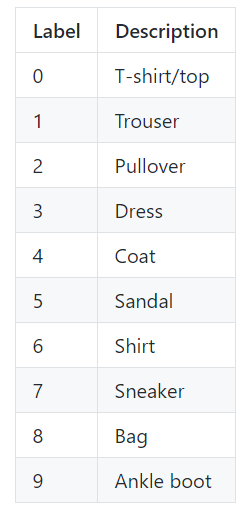

# Conclusiones

* La cantidad de capas ocultas importa (acá un artículo interesante https://scielo.conicyt.cl/scielo.php?script=sci_arttext&pid=S0718-07642004000500008) para este modelo se usó una porque solo una era necesaria, con 136 neuronas en la capa oculta, 10 de salida. 
* La categoría que mas falló fue la 6, pero es debido a que se parecen mucho las camisas. 
* El modelo finaliza con 88.5% de eficiencia.